# Predicting House Sale Prices - the right way

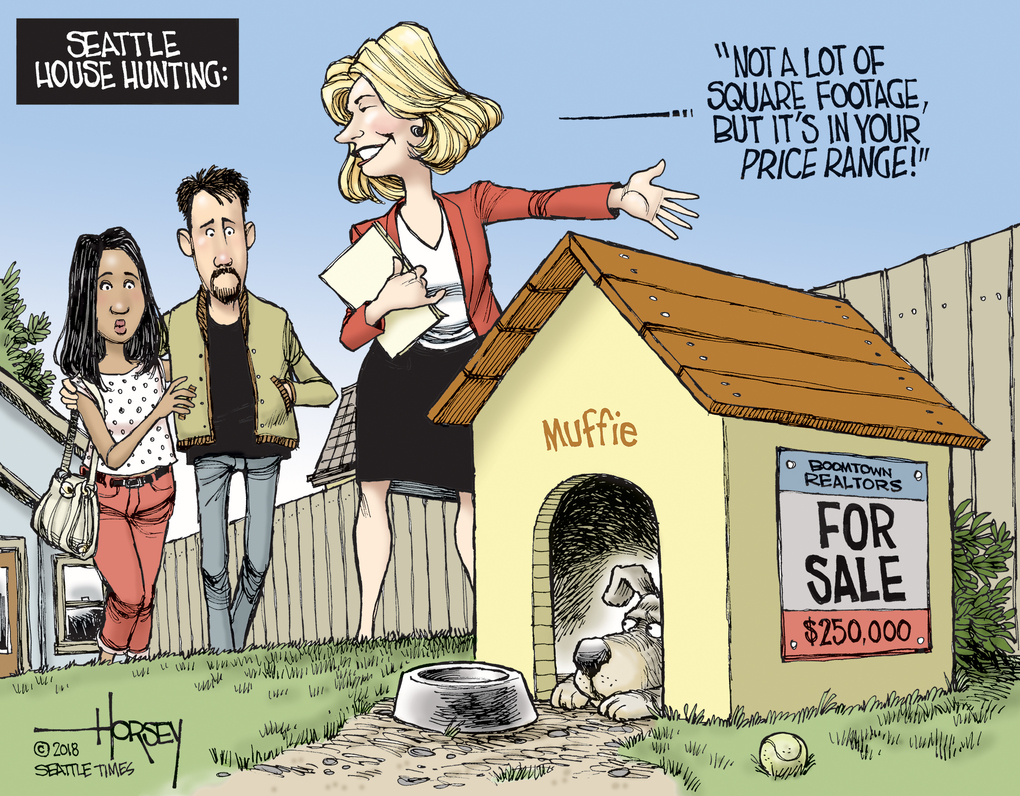


## Introduction

This project is the  reinterpretation of my previously project <a href="https://github.com/Vadim-Maklakov/Data-Science/blob/main/02_Predicting_House_Sale_Prices/Predicting_House_Sale_Prices.ipynb" target="_blank">Predicting House Sale Prices project</a>. After a while, I realize that it was the poking of a blind kitten against the walls, who didn't really know anything. Therefore, after some time, I decided to redo a previously made project.
In fact, it was a bunch of "spaghetti" code in the merciless  and senseless style `from the country that has the largest number of  programmers in the world`.


Now I will take a different look at this project, without a bunch of useless plots like heatmap, fortune-telling on coffee grounds with feature  engineering and etc. 


The primary goal of this project remain same - predicting house price using different algorithms from  <a href="https://scikit-learn.org/stable/index.html" target="_blank">scikit-learn</a>.

In this project I use original data from article <a href="https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627" target="_blank">Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project</a> by Dean De Cock, and use original dataset `AmesHousing.txt` and dictionary with descriptions attributes `DataDocumentation.txt` - you can download its from <a href="https://web.archive.org/web/20200802095935/http://jse.amstat.org:80/v19n3/decock/AmesHousing.txt" target="_blank">here</a> and <a href="https://web.archive.org/web/20201203235151/http://jse.amstat.org/v19n3/decock/DataDocumentation.txt" target="_blank"> here </a>.

I will not write many comments, all comments on the actions performed are inside the program code in cells.

**Caution**
Cross validation  for looking for the  optimal hyper parameters it takes the lot of  time.


## 2. Cleaning dataset

Load required modules and expore dataset. Print name of columns contains more than 5% NaN values, drop its and drops remain rows contain  NaN values in the dataset.

In [1]:
from IPython.display import display
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

from scipy.stats import skew

from sklearn.decomposition import PCA 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import numpy as np
import re

import warnings
warnings.filterwarnings('ignore')  
pd.set_option('display.max_columns', None)

# 1.1 Read dataset
ames = pd.read_excel("data/ames_house_price.xlsx")

# 1.2 Calculate NaN sum for each row
ames_nan_count = ames.isnull().sum()

print("ames raw contains {:,} and {:} columns\n".format(
                                            ames.shape[0],
                                            ames.shape[1]))

# 1.3 Print columns name with NaN more equal 5% and drop it

drop_columns = []

for i, feature in enumerate(ames_nan_count.index):
    nan = ames_nan_count[feature]
    nan_pc = nan/ames.shape[0]
    if nan_pc >= 0.05:
        drop_columns.append(feature)
        print ("row No ",  i+1 , ", row name ", feature,  
               f", NaN = {nan:,} or  % {nan_pc:.2%} \
from {ames.shape[0]:,} values.")

# 1.4 Drop columns        
ames.drop(axis=1, columns = drop_columns, inplace = True)

# 1.5 Check NaN values
print("\n NaN values columns stats")
display(ames.isnull().sum().sort_values(ascending = False).head(17))

# 1.6 Drop NaN, order and  PID columns  values and reset index
ames.dropna(axis = 0, inplace = True)
ames.drop(['Order', 'PID'], axis =1, inplace = True)
ames.reset_index(drop = True, inplace = True)
print("\names after cleaning contains {:,} and {:} columns\n".format(
                                            ames.shape[0],
                                            ames.shape[1]))

ames raw contains 2,930 and 82 columns

row No  5 , row name  Lot Frontage , NaN = 490 or  % 16.72% from 2,930 values.
row No  8 , row name  Alley , NaN = 2,732 or  % 93.24% from 2,930 values.
row No  59 , row name  Fireplace Qu , NaN = 1,422 or  % 48.53% from 2,930 values.
row No  60 , row name  Garage Type , NaN = 157 or  % 5.36% from 2,930 values.
row No  61 , row name  Garage Yr Blt , NaN = 159 or  % 5.43% from 2,930 values.
row No  62 , row name  Garage Finish , NaN = 159 or  % 5.43% from 2,930 values.
row No  65 , row name  Garage Qual , NaN = 159 or  % 5.43% from 2,930 values.
row No  66 , row name  Garage Cond , NaN = 159 or  % 5.43% from 2,930 values.
row No  74 , row name  Pool QC , NaN = 2,917 or  % 99.56% from 2,930 values.
row No  75 , row name  Fence , NaN = 2,358 or  % 80.48% from 2,930 values.
row No  76 , row name  Misc Feature , NaN = 2,824 or  % 96.38% from 2,930 values.

 NaN values columns stats


Bsmt Exposure     83
BsmtFin Type 2    81
Bsmt Cond         80
Bsmt Qual         80
BsmtFin Type 1    80
Mas Vnr Type      23
Mas Vnr Area      23
Bsmt Half Bath     2
Bsmt Full Bath     2
Garage Cars        1
Garage Area        1
BsmtFin SF 2       1
BsmtFin SF 1       1
Bsmt Unf SF        1
Total Bsmt SF      1
Electrical         1
Gr Liv Area        0
dtype: int64


ames after cleaning contains 2,821 and 69 columns



## 2. Feature engineering

For selecting statistical significant features  define this function that encode categorical values to numerics, scale and transform values for decreasing number of outliers and  tends to become the minimum skewness value.
Second function using `SelectKBest(score_func=mutual_info_regression, k='all')` for calculating mutual values.

In [2]:
# Function for collect statistics information for selected feature

def column_stats(nparray):
    """
    Parameters
    ----------
    nparray : pandas column values or 1-D np.array
        Calculate skewnes, numbers and pcent outliers for input 1-D np.array

    Returns
    -------
        skewnes, num_outs, pc_outs
    """
    test = nparray[:]
    skewness = skew(test)
    q_25 = np.percentile(test, 25)
    q_75 = np.percentile(test, 75)
    out_range =  1.5 * (q_75 - q_25)
    lower, upper = q_25 - out_range, q_75 + out_range 
    num_outs = len([x for x in test if x < lower or x > upper])
    pc_outs = num_outs / float(len(test))
    return skewness, num_outs, pc_outs


# Function for defining statistical significant features and optimal scaling  and 
# transformation columns with minimal outliers and near zero skew 

def numordcatsgstat(dataframe):
    """
    Define  impact features using mutual information  and collect 
    statistical signification  for raw and transformed data for mixed numeric 
    and  categorical dataframe. All categorical data convert to numeric using
    ordinal encoders. 
    For transformation data using all possible combination linear and non linear
    transformation.
        Parameters
    ----------
    dataframe : pandas dataframe without NaN values with categorical and 
    numerical data.
        Returns
    -------
    fs_df - pandas dataframe with detailed information for skewness, outliers
    fs_skew_df - pandas dataframe with skewnes sorting columns summary modules by asc 
    fs_outs_df- pandas dataframe with skewnes sorting columns summary  by asc

    """
    df = dataframe.copy()
    cols_cat = df.select_dtypes(include = 'object').columns
    cols_num = df.select_dtypes(include = 'number').columns
    
    df_x = df.iloc[:, :-1]
    df_y = df.iloc[:, [-1]]
    
    df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
        df_x, df_y, train_size = 0.7, random_state=42)
    
    # Convert category values to numeric with Ordinal Encoder 
    if len(cols_cat) != 0:
        # Convert for MI search fututres
        oe_enc_train = OrdinalEncoder()
        df_x_train[cols_cat] = oe_enc_train.fit_transform(df_x_train[cols_cat])
        oe_enc_test = OrdinalEncoder()
        df_x_test[cols_cat] = oe_enc_test.fit_transform(df_x_test[cols_cat])
        # Convert for get statistics for all dataset
        oe_enc_all = OrdinalEncoder()
        df[cols_cat] = oe_enc_all.fit_transform(df[cols_cat])
    
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(df_x_train, df_y_train)
    
    # transform train input data
    x_train_fs = fs.transform(df_x_train)
    
    # transform test input data
    x_test_fs = fs.transform(df_x_test)
    fs_names = list(fs.feature_names_in_)
    
    # Insert y column name  in the features list with 0 index 
    fs_names.insert(0, list(df_y.columns)[0])
    # Assign type of x columns for features except y
    fs_cat = ["num" if  name in set(cols_num) else "cat" for name in fs_names ]
    
    # Exctract MI values and insert value = 1 for y
    fs_vals = list(fs.scores_)
    fs_vals.insert(0, 1.0)
    # Create dataframe for collect MI and stats values
    fs_df = pd.DataFrame({"fs": fs_names, "cat": fs_cat, "mi_val":fs_vals }) 
    
    # Collect stats for column without transformation
    fs_columns = list(fs_df["fs"].values)
    skewns = []
    out_num = []
    out_pc = []
    for feature in fs_columns:
        fs_skew, fs_outs_nums, fs_outs_pc = column_stats(df[feature].values)
        skewns.append(fs_skew)
        out_num.append(fs_outs_nums)
        out_pc.append(fs_outs_pc)
    
    # Add raw slats in tne dataframe
    fs_df["skew"] = skewns
    fs_df["outs"] = out_num
    fs_df["outs_pc"] = out_pc  
    
    
    # define list of scalers
    mms = MinMaxScaler()
    rs = RobustScaler()
    qt = QuantileTransformer(n_quantiles=int(df.shape[0]/3), output_distribution='normal')
    ssc = StandardScaler()
    
    # Define list of power transformers
    pw_yj = PowerTransformer(method='yeo-johnson')
    
    # define list only separated scalers and transformers list
    transformers = [mms, ssc, rs , qt, pw_yj]
    col_prefix = ["_mms",  "_ssc", "_rs", "_qt", "_pw_yj"]
    
    # Calculate slats for simple scale and non  linear  transformers separately 
    for i, scaler in enumerate(transformers):
        df_trs = df.copy() 
        df_trs.iloc[:, :] = scaler.fit_transform(df_trs)
        tr_skew = []
        tr_outs_num = []
        tr_outs_pc = []
        for feature in fs_columns:
            tr_fs_skew, tr_fs_outs_nums, tr_fs_outs_pc = column_stats(df_trs[feature].values)
            tr_skew.append(tr_fs_skew)
            tr_outs_num.append(tr_fs_outs_nums)
            tr_outs_pc.append(tr_fs_outs_pc)
        col_name_tr_skew = "skew" + col_prefix[i]
        col_name_tr_outs = "outs" + col_prefix[i]
        col_name_tr_outs_pc = "outs" + col_prefix[i] + "_pc"
        fs_df[col_name_tr_skew] = tr_skew
        fs_df[col_name_tr_outs] = tr_outs_num
        fs_df[col_name_tr_outs_pc] = tr_outs_pc
        del df_trs
    
    # calculate slats consequence for scalers and non linear transforms                   
    linear_conv = [mms, ssc, rs] 
    linear_prefix = ["_mms",  "_ssc", "_rs"]
    non_linear_conv = [qt, pw_yj] 
    non_linear_prefix = ["_qt", "_pw_yj"]
    for i, scaler_2   in enumerate(linear_conv):
        df_scaler_2 = df.copy() 
        df_scaler_2.iloc[:, :] = scaler_2.fit_transform(df_scaler_2)
        for j, trans in enumerate(non_linear_conv):
            df_scaler_2_trs = df_scaler_2.copy() 
            df_scaler_2_trs.iloc[:, :] = trans.fit_transform(df_scaler_2_trs)
            sc_2_tr_skew = []
            sc_2_tr_outs_num = []
            sc_2_tr_outs_pc = []
            for feature in fs_columns:
                fs_skew, fs_outs_nums, fs_outs_pc = \
                    column_stats(df_scaler_2_trs[feature].values)
                sc_2_tr_skew.append(fs_skew)
                sc_2_tr_outs_num.append(fs_outs_nums)
                sc_2_tr_outs_pc.append(fs_outs_pc)
            col_name_sc2_tr_skew = "skew" + linear_prefix[i] + non_linear_prefix[j]
            col_name_sc_2_tr_outs = "outs" + linear_prefix[i] \
                + non_linear_prefix[j]
            col_name_sc_2_tr_outs_pc = "outs" + linear_prefix[i] \
                + non_linear_prefix[j] + "_pc"
            fs_df[col_name_sc2_tr_skew] = sc_2_tr_skew
            fs_df[col_name_sc_2_tr_outs] = sc_2_tr_outs_num
            fs_df[col_name_sc_2_tr_outs_pc] = sc_2_tr_outs_pc
            del df_scaler_2_trs
        del df_scaler_2
    
    # Calculate separately  MinMaxScaler and power transformation with Box-Cox
    mms_2 = MinMaxScaler(feature_range=(1, 2))
    pw_bc = PowerTransformer(method='box-cox')
    df_mms = df.copy()
    df_mms.iloc[:,:] = mms_2.fit_transform(df_mms) 
    df_mms_bc = df_mms.copy()
    df_mms_bc.iloc[:,:] = pw_bc.fit_transform(df_mms_bc) 
    mms_bc_skewns =[] 
    mms_bc_outs_num = []
    mms_bc_outs_pc = []
    for feature in fs_columns:
        mms_bc_skew, mms_bc_out, mms_bc_out_pc = column_stats(df_mms_bc[feature].values)
        mms_bc_skewns.append(mms_bc_skew)
        mms_bc_outs_num.append(mms_bc_out)
        mms_bc_outs_pc.append(mms_bc_out_pc)
    
    fs_df["skew_mms_pw_bc"] = mms_bc_skewns
    fs_df["mms_pw_bc_outs"] = mms_bc_outs_num
    fs_df["mms_pw_bc_outs_pc"] = mms_bc_outs_pc
    
    # Sort mi_val by descending  detailed slats dataframe
    fs_df.sort_values("mi_val", ascending = False, inplace=True)
    fs_df.reset_index(drop = True, inplace=True)
    
    # Create dataframes with sorted  skewness and number outiers from min to max
    # dataframe for skewness
    pat_skew = r"(skew_\w+)"
    fs_skew_first_cols = list(fs_df.columns)[:4]
    
    # sort columns name  from min  to max by skew module sum
    fs_skew_cols = [column for column in list(fs_df.columns) if \
                    re.match(pat_skew, column) != None]
    fs_skew_mod_sum = [np.sum(np.absolute(fs_df[column].values)) for column in 
                       fs_skew_cols]
    fs_skew_val_name = sorted(zip(fs_skew_cols,fs_skew_mod_sum ), key=lambda k: k[1])    
    
    # reassign ored  name for fs_skew_cols 
    fs_skew_cols = [value[0] for value in fs_skew_val_name] 
    fs_skew_cols =  fs_skew_first_cols + fs_skew_cols
    fs_skew_df = fs_df[fs_skew_cols]
    
    # Add last line with sumary skew modules
    fs_skew_df_cols = list(fs_skew_df.columns)
    sk_last_row = ["Total", np.nan, np.nan]
    sk_last_row_sum = [np.sum(np.absolute(fs_skew_df[column].values)) for column in 
                       fs_skew_df_cols[3:]]
    sk_last_row += sk_last_row_sum
    fs_skew_df.loc[fs_skew_df.shape[0]] = sk_last_row
    
    # dataframes with sorted  number outliers from min to max                        
    pat_outs = r"((skew?\w+)|(\w+pc)|(mi_?)|(cat)|(fs)|(\bouts\b))"
    fs_outs_first_cols = list(fs_df.columns)[:3]
    fs_outs_first_cols.append(list(fs_df.columns)[4])
    
    # sort columns name  from min  to max by outliers sum
    fs_outs_cols = [column for column in list(fs_df.columns) if \
                    re.match(pat_outs, column) == None ]
    fs_outs_sum = [np.sum(np.absolute(fs_df[column].values)) for column in 
                       fs_outs_cols]
    fs_outs_val_name = sorted(zip(fs_outs_cols,fs_outs_sum ), key=lambda k: k[1])    
    fs_outs_cols = [value[0] for value in fs_outs_val_name] 
    
    fs_outs_cols = fs_outs_first_cols + fs_outs_cols       
    fs_outs_df = fs_df[fs_outs_cols]
    
    # Add last line with summary outliers 
    out_df_cols = list(fs_outs_df.columns)
    out_last_row = ["Total", np.nan, np.nan]
    out_last_row_sum = [fs_outs_df[column].sum() for column in 
                       out_df_cols[3:]]
    out_last_row += out_last_row_sum
    fs_outs_df.loc[fs_outs_df.shape[0]] = out_last_row
    return fs_df, fs_skew_df, fs_outs_df 


ames_fs, ames_sk, ames_outs = numordcatsgstat(ames)
display(ames_fs.head(20))

,fs,cat,mi_val,skew,outs,outs_pc,skew_mms,outs_mms,outs_mms_pc,skew_ssc,outs_ssc,outs_ssc_pc,skew_rs,outs_rs,outs_rs_pc,skew_qt,outs_qt,outs_qt_pc,skew_pw_yj,outs_pw_yj,outs_pw_yj_pc,skew_mms_qt,outs_mms_qt,outs_mms_qt_pc,skew_mms_pw_yj,outs_mms_pw_yj,outs_mms_pw_yj_pc,skew_ssc_qt,outs_ssc_qt,outs_ssc_qt_pc,skew_ssc_pw_yj,outs_ssc_pw_yj,outs_ssc_pw_yj_pc,skew_rs_qt,outs_rs_qt,outs_rs_qt_pc,skew_rs_pw_yj,outs_rs_pw_yj,outs_rs_pw_yj_pc,skew_mms_pw_bc,mms_pw_bc_outs,mms_pw_bc_outs_pc
0,SalePrice,num,1.000000,1.770860,131,0.046437,1.770860,131,0.046437,1.770860,131,0.046437,1.770860,131,0.046437,0.009048,20,0.007090,-0.009337,51,0.018079,0.009030,20,0.007090,0.021809,16,0.005672,0.009000,20,0.007090,-0.022055,20,0.007090,0.009048,18,0.006381,-0.043116,29,0.010280,0.021809,16,0.005672
1,Neighborhood,cat,0.568568,-0.180941,0,0.000000,-0.180941,0,0.000000,-0.180941,0,0.000000,-0.180941,0,0.000000,-0.105100,52,0.018433,-0.245640,0,0.000000,-0.113873,52,0.018433,-0.102976,0,0.000000,-0.102139,52,0.018433,-0.015577,0,0.000000,-0.116875,52,0.018433,-0.017949,0,0.000000,-0.102976,0,0.000000
2,Overall Qual,num,0.559951,0.269305,1,0.000354,0.269305,40,0.014179,0.269305,10,0.003545,0.269305,1,0.000354,0.993569,40,0.014179,0.007803,10,0.003545,0.755306,31,0.010989,0.000115,10,0.003545,1.144409,31,0.010989,-0.038640,10,0.003545,0.993569,40,0.014179,-0.032066,10,0.003545,0.000115,10,0.003545
3,Gr Liv Area,num,0.466956,1.284398,74,0.026232,1.284398,74,0.026232,1.284398,74,0.026232,1.284398,74,0.026232,-0.001058,20,0.007090,0.000000,0,0.000000,-0.001165,20,0.007090,0.019497,11,0.003899,-0.002212,20,0.007090,0.042642,13,0.004608,-0.001065,20,0.007090,0.034663,15,0.005317,0.019497,11,0.003899
4,Garage Area,num,0.428704,0.262775,43,0.015243,0.262775,44,0.015597,0.262775,43,0.015243,0.262775,43,0.015243,-1.793846,156,0.055300,-0.267414,175,0.062035,-1.793360,161,0.057072,0.012101,34,0.012052,-1.793015,156,0.055300,0.008983,34,0.012052,-1.791563,156,0.055300,0.003250,34,0.012052,0.012101,34,0.012052
5,Year Built,num,0.410498,-0.622232,8,0.002836,-0.622232,8,0.002836,-0.622232,8,0.002836,-0.622232,8,0.002836,0.054222,13,0.004608,-0.145681,0,0.000000,0.054222,13,0.004608,-0.183405,0,0.000000,0.046011,13,0.004608,-0.137289,0,0.000000,0.034807,13,0.004608,-0.126149,0,0.000000,-0.183405,0,0.000000
6,Garage Cars,num,0.387570,-0.204721,16,0.005672,-0.204721,16,0.005672,-0.204721,16,0.005672,-0.204721,16,0.005672,-2.165082,158,0.056009,-0.005831,16,0.005672,-2.165082,158,0.056009,0.010131,16,0.005672,-2.111622,525,0.186104,0.111100,16,0.005672,-2.165082,158,0.056009,0.035435,16,0.005672,0.010131,16,0.005672
7,Total Bsmt SF,num,0.363134,1.726100,42,0.014888,1.726100,42,0.014888,1.726100,42,0.014888,1.726100,42,0.014888,0.001102,23,0.008153,0.034505,33,0.011698,0.001309,23,0.008153,-0.008821,24,0.008508,0.001354,23,0.008153,-0.005451,24,0.008508,0.001294,23,0.008153,-0.013838,25,0.008862,-0.008821,24,0.008508
8,1st Flr SF,num,0.346935,1.424238,41,0.014534,1.424238,41,0.014534,1.424238,41,0.014534,1.424238,41,0.014534,0.004216,17,0.006026,0.000000,0,0.000000,0.004216,17,0.006026,0.029702,3,0.001063,0.004160,17,0.006026,0.034846,4,0.001418,0.003856,17,0.006026,0.017966,4,0.001418,0.029702,3,0.001063
9,Bsmt Qual,cat,0.339707,-0.469381,0,0.000000,-0.469381,0,0.000000,-0.469381,0,0.000000,-0.469381,0,0.000000,-0.332880,0,0.000000,-0.265265,0,0.000000,-0.332880,0,0.000000,-0.194465,0,0.000000,-0.247911,0,0.000000,-0.180885,0,0.000000,-0.332880,0,0.000000,-0.200303,0,0.000000,-0.194465,0,0.000000


as seen above minimal values of outliers in the three cases of sequential combination : 

* 1. MinMaxScaler() plus PowerTransformer(method='box-cox')
* 2. MinMaxScaler()  plus PowerTransformer(method='yeo-johnson') 
* 3. RobustScaler() and QuantileTransformer()

Since the first and second cases have the same outliers values , then for the sake of sport , I then take the first and third cases into work.


##  3. Feature Selection

I remain features that have  mutual values more than 0.10 

In [3]:
# Select features and revert y to last column and assign it to new dataframe
fs_1 = list(ames_fs[ames_fs.mi_val > 0.1].fs.values)[::-1]
ames_1_num_cat = ames[fs_1]

## 4.  Finding best estimators with default hyperparameters

In [4]:
# Encode cat values for selected features

def ordencoder(dataframe):
    """
    Ordinal encoder for categorical data in the  mixed dataset with numeric and 
    categorical data.
    Parameters
    ----------
    dataframe : mixed dataset with numeric and categorical data
    Returns
    -------
    df : dataframe with only numerical data

    """
    df = dataframe.copy()
    cols_cat = df.select_dtypes(include = 'object').columns
    # Convert category values to numeric with Ordinal Encoder 
    if len(cols_cat) != 0:
        # Convert for MI search fututres
        oe_enc_train = OrdinalEncoder()
        df[cols_cat] = oe_enc_train.fit_transform(df[cols_cat])
    return df


ames_1_num = ordencoder(ames_1_num_cat)


# Create three pipelines for robust scaler and QuantileTransformer and for MinMaxScaler 
# and  Box-Cox

pipe_1_rs_qt = [('rs', RobustScaler()), 
            ('qt', QuantileTransformer(n_quantiles=int(ames_1_num.shape[0]/3),
            output_distribution='normal'))] 
pipe_2_mms_pw_bc = [('mms', MinMaxScaler(feature_range=(1, 2))), 
                ("pw_bc", PowerTransformer(method='box-cox'))]
pipe_3_pca = [("pca", PCA()), ('mms', MinMaxScaler(feature_range=(1, 2))), 
                ("pw_bc", PowerTransformer(method='box-cox'))]

def best_estimator_cv(dataframe, pipe_list, k_folds = 5):
    """
    Collect  statistical data for choising best estimators for regression tasks.
    Parameters
    ----------
    dataframe : input dataframe with numeric data
        DESCRIPTION. y must to have last columns.
    k_folds : folds for cross validation
        DESCRIPTION. The default is 5.
    pipe_list : list 
        DESCRIPTION. list with pipeline values for transforming values

    Returns
    -------
    estimators_stats dataframe with name of estimators and values for R2 and 
    mae fir each estimator
    """
    pipe_trans = pipe_list[:]
    X = dataframe.iloc[:, :-1].values
    Y = np.ravel(dataframe.iloc[:, [-1]].values)
    est_models = [LinearRegression(), Ridge(), Lasso(), SVR(), NuSVR(), LinearSVR(),
                  RandomForestRegressor()]
    est_templ = {"estimator":['ols', 'ridge', 'lasso', 'svr', 'nu_svr', 'lin_svr', 
                              'rand_forest'],
                 "r2_mean":[], "r2_std":[], "mae_mean":[], "mae_std":[]}
    for i, value in enumerate(est_templ["estimator"]):
        pipe_temp = pipe_trans[:] 
        pipe_temp.append((value, est_models[i]))
        test_model = Pipeline(pipe_temp)
        # Evaluate pipeline
        kfold = KFold(n_splits = k_folds, shuffle= True, random_state = 42)
        r2 = cross_val_score(test_model, X, Y, scoring = "r2", n_jobs=6, cv = kfold)
        est_templ["r2_mean"].append(r2.mean())
        est_templ["r2_std"].append(r2.std())
        mae = -cross_val_score(test_model, X, Y, scoring = "neg_mean_absolute_error",
                               n_jobs=4, cv = kfold)
        est_templ["mae_mean"].append(mae.mean())
        est_templ["mae_std"].append(mae.std())
    estimators_stats = pd.DataFrame(est_templ).sort_values("mae_mean", 
                                                           ascending = True)
    estimators_stats.reset_index(drop = True, inplace=True)
    return estimators_stats

est_1_rs_qt = best_estimator_cv(ames_1_num, pipe_1_rs_qt)
est_2_mms_pw_bc = best_estimator_cv(ames_1_num, pipe_2_mms_pw_bc)
est_3_pca = best_estimator_cv(ames_1_num, pipe_3_pca)

print("RobustScaler() and QuantileTransformer()")
display(est_1_rs_qt)

print("\nMinMaxScaler() and PowerTransformer(method='box-cox')")
display(est_2_mms_pw_bc)

print("\nPCA() and and PowerTransformer(method='box-cox')")
display(est_3_pca)

RobustScaler() and QuantileTransformer()


,estimator,r2_mean,r2_std,mae_mean,mae_std
0,rand_forest,0.894957,0.017796,15897.982587,562.218968
1,ridge,0.829430,0.023193,21581.737006,594.186282
2,lasso,0.829431,0.023206,21581.978458,595.118346
3,ols,0.829424,0.023212,21582.408822,595.348551
4,svr,-0.062372,0.015012,55695.616270,1268.943797
5,nu_svr,-0.015075,0.008129,56259.011070,1128.677777
6,lin_svr,-3.058945,0.098866,119350.684062,3642.111489



MinMaxScaler() and PowerTransformer(method='box-cox')


,estimator,r2_mean,r2_std,mae_mean,mae_std
0,rand_forest,0.896859,0.015212,15804.702660,629.779765
1,ridge,0.824969,0.012701,21878.047004,345.835494
2,lasso,0.824962,0.012708,21879.779504,347.534402
3,ols,0.824960,0.012708,21880.345065,347.729348
4,svr,-0.062424,0.014940,55692.314828,1268.705974
5,nu_svr,-0.015178,0.008122,56260.161507,1127.929920
6,lin_svr,-5.127879,0.250496,180146.053091,2417.413968



PCA() and and PowerTransformer(method='box-cox')


,estimator,r2_mean,r2_std,mae_mean,mae_std
0,rand_forest,0.851175,0.025645,18765.873687,860.622217
1,ridge,0.738504,0.090532,22428.204199,840.462706
2,lasso,0.738462,0.090599,22430.535058,840.596945
3,ols,0.738449,0.090614,22431.411618,840.376463
4,svr,-0.064881,0.014863,55785.552078,1268.869563
5,nu_svr,-0.016739,0.008050,56324.899865,1126.777935
6,lin_svr,-5.127879,0.250496,180146.053091,2417.413968


The minimal MAE mean has combination MinMaxScaler() and PowerTransformer(method='box-cox') with almost equal R2 values.

Remain it and for further work. For clarity, I specially don't delete outliers. As see above the  SVM regression
algorithms didn't convergence by R2 values - remove them from further consideration.

## 5. Finding best hyper parameters

In [5]:
# Remain only  MinMaxScaler and PowerTransformer
# Divide X and Y and split to train and test set
X = ames_1_num.iloc[:, :-1].values
y = np.ravel(ames_1_num.iloc[:, [-1]].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5,
    random_state=42)

# Remain only  ordinal least square, ridge, lasso, random forest  and  greate pipilne 
# with  MinMaxScaler and Power Transformer with Box-Cox
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

gs_scalers =  [('mms', MinMaxScaler(feature_range=(1, 2))), 
            ("pw_bc", PowerTransformer(method='box-cox'))]

gs_estms = [Ridge(), Lasso(), RandomForestRegressor()]
gs_str_estms = ['ridge', 'lasso', 'rand_forest']                    

gs_params=  [[{'ridge__alpha': np.logspace(1.1, 3, num = 60)}],
            [{'lasso__alpha': np.logspace(1, 3, num = 60)}],
            [{'rand_forest__n_estimators': np.int_(np.logspace(1, 3, num=40))}]]

best_params_tmpl ={"estimarors": ["ridge", "lasso", "rand_forest"],
                   "r2_best":[],
                   "r2_best_params":[],
                   "mae_best":[],
                   "mae_best_params":[]}
for i, val in enumerate(gs_str_estms):
    gs_scaler_tmp = gs_scalers[:]
    gs_scaler_tmp.append((val, gs_estms[i]))
    gs_pipl_tmp = Pipeline(gs_scaler_tmp)
    gs_r2 =GridSearchCV(gs_pipl_tmp,gs_params[i],  
                                       cv = cv,
                                       n_jobs = 8) 
    gs_r2 = gs_r2.fit(X, y)
    r2_best_score = gs_r2.best_score_ 
    r2_best_param = [v for k, v in gs_r2.best_params_.items()][0]
    best_params_tmpl["r2_best"].append(r2_best_score)
    best_params_tmpl["r2_best_params"].append(r2_best_param)
    gs_mae =GridSearchCV(gs_pipl_tmp,gs_params[i],  
                                       cv = cv,
                                       scoring = "neg_mean_absolute_error",
                                       n_jobs = 8) 
    gs_mae = gs_mae.fit(X, y)
    mae_best_score = -gs_mae.best_score_
    mae_best_param = [v for k, v in gs_mae.best_params_.items()][0]
    best_params_tmpl['mae_best'].append(mae_best_score)
    best_params_tmpl['mae_best_params'].append(mae_best_param)

best_params = pd.DataFrame(best_params_tmpl).\
    sort_values("r2_best",ascending= False).reset_index(drop = True)
display(best_params)

,estimarors,r2_best,r2_best_params,mae_best,mae_best_params
0,rand_forest,0.896721,437.000000,15560.033433,554.000000
1,ridge,0.824969,93.216228,21666.178442,476.393801
2,lasso,0.824465,166.088278,21794.103701,423.758716


## 6. Train and predict  values for final  models and collect theirs metrics 

In [6]:
# Define best hyper parameters for final training
r2_n_estimators = int(best_params.iloc[0,2])
r2_ridge_alpha = best_params.iloc[1,2]
r2_lasso_alpha = best_params.iloc[2,2]

mae_n_estumator = int(best_params.iloc[0,4])
mae_ridge_alpha = best_params.iloc[1,4]
mae_lasso_alpha = best_params.iloc[2,4]


# Final training model with R2, RMSE,  MAE
# Defining values for future Pipelines temolates
fin_pipe = [('mms', MinMaxScaler(feature_range=(1, 2))), 
             ("pw_bc", PowerTransformer(method='box-cox'))]
fin_mod_estms_r2 = [RandomForestRegressor(r2_n_estimators, n_jobs=-1), 
                    Ridge(alpha=r2_ridge_alpha), 
                    Lasso(alpha = r2_lasso_alpha),
                    LinearRegression(n_jobs=-1)]
fin_mod_estms_mae = [RandomForestRegressor(mae_n_estumator, n_jobs=-1), 
                    Ridge(alpha = mae_ridge_alpha), 
                    Lasso(alpha = mae_lasso_alpha),
                    LinearRegression(n_jobs=-1)]
fin_mod_estms_str = ["rand_forest", "ridge", "lasso", "ols_lin_reg"]


# Split train and test data 
X = ames_1_num.iloc[:, :-1].values
y = np.ravel(ames_1_num.iloc[:, [-1]].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5,
    random_state=42)


# Dictionaries for metrics comparison test and predict data 
fin_r2_tmpl = {"estimator":fin_mod_estms_str, 
               "r2_test":[],
               "r2_train":[],
               "rmse_test":[],
               "rmse_train":[],
               "mae_test":[],
               "mae_train":[]}

fin_mae_tmpl = {"estimator":fin_mod_estms_str, 
               "r2_test":[],
               "r2_train":[],
               "rmse_test":[],
               "rmse_train":[],
               "mae_test":[],
               "mae_train":[]}

# Dictionaries for test and predict values
fin_y_pred_r2 = {"y_test": y_test,
                 "y_rand_forest":None,
                 "y_ridge":None,
                 "y_lasso":None,
                 "y_ols_lin_reg":None}
fin_y_pred_mae = {"y_test": y_test,
                 "y_rand_forest":None,
                 "y_ridge":None,
                 "y_lasso":None,
                 "y_ols_lin_reg":None}
predict_keys = list(fin_y_pred_r2.keys())[1:]

for i, val in enumerate(fin_mod_estms_str):
    # Collect metrics and predict values for the best R2  hyperparameters 
    # Add estimator to Piplline template
    pipe_r2 = fin_pipe[:]
    pipe_r2.append((val, fin_mod_estms_r2[i]))
    model_r2 = Pipeline(pipe_r2)
    model_r2.fit(X_train, y_train)
    r2_train_sc = model_r2.score(X_train, y_train) 
    r2_y_pred = model_r2.predict(X_test)
    r2_test_sc = r2_score(y_test, r2_y_pred)
    r2_test_rmse = mean_squared_error(y_test, r2_y_pred, squared=False)
    r2_train_rmse = mean_squared_error(y_train, model_r2.predict(X_train),
                                       squared=False)
    r2_test_mae = mean_absolute_error(y_test, r2_y_pred)
    r2_train_mae = mean_absolute_error(y_train, model_r2.predict(X_train))
    fin_r2_tmpl["r2_test"].append(r2_test_sc)
    fin_r2_tmpl["r2_train"].append(r2_train_sc)
    fin_r2_tmpl["rmse_test"].append(r2_test_rmse)
    fin_r2_tmpl["rmse_train"].append(r2_train_rmse)
    fin_r2_tmpl["mae_test"].append(r2_test_mae)
    fin_r2_tmpl["mae_train"].append(r2_test_mae)
    fin_y_pred_r2[predict_keys[i]] = r2_y_pred
    
    # Collect metrica and predict values for the best MAE hyperparameters
    pipe_mae = fin_pipe[:]
    pipe_mae.append((val, fin_mod_estms_mae[i]))
    model_mae = Pipeline(pipe_mae)
    model_mae.fit(X_train, y_train)
    mae_train_sc = model_mae.score(X_train, y_train) 
    mae_y_pred = model_mae.predict(X_test)
    mae_test_sc = model_mae.score(X_test, y_test)
    mae_test_rmse = mean_squared_error(y_test, mae_y_pred, squared=False)
    mae_train_rmse = mean_squared_error(y_train, model_mae.predict(X_train), 
                                        squared=False)
    mae_test_mae = mean_absolute_error(y_test, mae_y_pred)
    mae_train_mae = mean_absolute_error(y_train, model_mae.predict(X_train))
    fin_mae_tmpl["r2_test"].append(mae_test_sc)
    fin_mae_tmpl["r2_train"].append(mae_train_sc)
    fin_mae_tmpl["rmse_test"].append(mae_test_rmse)
    fin_mae_tmpl["rmse_train"].append(mae_train_rmse)
    fin_mae_tmpl["mae_test"].append(mae_test_mae)
    fin_mae_tmpl["mae_train"].append(mae_test_mae)
    fin_y_pred_mae[predict_keys[i]] = mae_y_pred
    
# Create final dataframes with metrics
fin_r2_mtrs = pd.DataFrame(fin_r2_tmpl)
fin_r2_mtrs.insert(5, "rmse_delta", fin_r2_mtrs.iloc[:,4] - fin_r2_mtrs.iloc[:,3])
fin_r2_mtrs.sort_values("rmse_delta", ascending = True, inplace=True)
fin_r2_mtrs.reset_index(drop=True, inplace=True)

fin_mae_mtrs = pd.DataFrame(fin_mae_tmpl)
fin_mae_mtrs.insert(5, "rmse_delta", fin_mae_mtrs.iloc[:,4] - fin_mae_mtrs.iloc[:,3])
fin_mae_mtrs.sort_values("rmse_delta", ascending = True, inplace=True)
fin_mae_mtrs.reset_index(drop=True, inplace=True)


# Create final dataframes with y_test and predict values
fin_r2_y_vals = pd.DataFrame(fin_y_pred_r2)
fin_mae_y_vals = pd.DataFrame(fin_y_pred_mae)
print("Best R2 statistics")
display(fin_r2_mtrs)
print("\nBest MAE statistics")
display(fin_mae_mtrs)

Best R2 statistics


,estimator,r2_test,r2_train,rmse_test,rmse_train,rmse_delta,mae_test,mae_train
0,rand_forest,0.923477,0.984759,23173.975328,9712.129698,-13461.845630,14765.100346,14765.100346
1,ridge,0.827477,0.827317,34795.860273,32690.946307,-2104.913966,21891.042425,21891.042425
2,ols_lin_reg,0.828380,0.827914,34704.712030,32634.397946,-2070.314084,22006.706198,22006.706198
3,lasso,0.828970,0.827685,34644.966532,32656.098295,-1988.868237,21872.208178,21872.208178



Best MAE statistics


,estimator,r2_test,r2_train,rmse_test,rmse_train,rmse_delta,mae_test,mae_train
0,rand_forest,0.922017,0.985153,23393.947406,9585.615734,-13808.331672,14829.931536,14829.931536
1,ridge,0.820490,0.822902,35493.454891,33106.251246,-2387.203645,21954.797180,21954.797180
2,ols_lin_reg,0.828380,0.827914,34704.712030,32634.397946,-2070.314084,22006.706198,22006.706198
3,lasso,0.828761,0.826826,34666.189735,32737.349534,-1928.840201,21685.554216,21685.554216


Plot y_test and y_predict values:

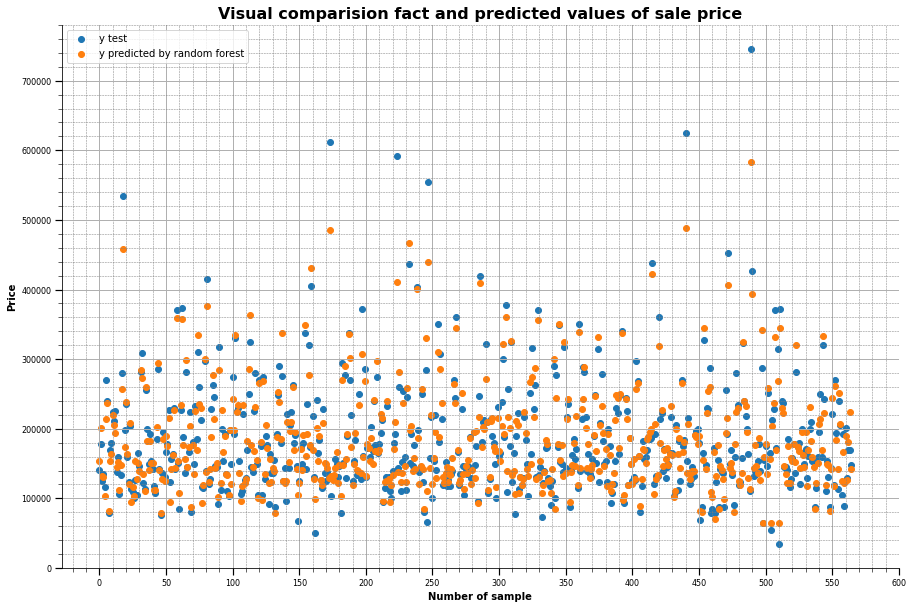

In [7]:
ax, fig = plt.subplots(figsize=(15,10))
ax = plt.gca()
ax.scatter(x = fin_r2_y_vals.index, y = fin_r2_y_vals.y_test, label="y test")
ax.scatter(x = fin_r2_y_vals.index, y = fin_r2_y_vals.y_rand_forest, 
           label="y predicted by random forest")
#ax.set_yscale('log')
ax.set_xlabel("Number of sample", weight="bold")
ax.set_ylabel("Price", rotation=90, weight="bold")
ax.set_title("Visual comparision fact and predicted values of sale price", 
             fontsize=16, weight="bold")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

major_xticks = np.arange(0, 650, 50)
ax.set_xticks(major_xticks)

ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
 
ax.grid(which='major', linewidth=1)
ax.grid(which='minor', linestyle='--', color='gray', linewidth=0.5)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', length=7, width=1.2)
ax.tick_params(which='minor', length=4, width=0.6)

plt.show()

Calculate the multicollinearity of our original dataset before conclusion:

In [8]:
# Check collinerity for ames_1_num
X_vif_chk = ames_1_num.iloc[:, :-1]
# Create VIF dataframe
vif_stats = pd.DataFrame()
vif_stats["feature"] = X_vif_chk.columns
vif_stats["vif_value"] = [variance_inflation_factor(X_vif_chk.values, i)
                          for i in range(len(X_vif_chk.columns))]
vif_stats.sort_values("vif_value", ascending = False, inplace = True)
vif_stats.reset_index(drop=True, inplace = True)
print("VIF statistics for multicollinearity")
display(vif_stats)

VIF statistics for multicollinearity


,feature,vif_value
0,Year Remod/Add,14052.407397
1,Year Built,13617.883273
2,Gr Liv Area,1217.170334
3,1st Flr SF,771.223981
4,2nd Flr SF,145.463306
5,Overall Qual,67.819584
6,TotRms AbvGrd,58.299443
7,Total Bsmt SF,50.150450
8,Overall Cond,41.563777
9,Exterior 1st,39.134990


## Conclusion

* 1. The correct choice of scaling and transformation allows you to reduce the number of outliers and allows you to get sufficiently accurate values for prediction and solved the problem of multicollinearity - i.e. even a simple linear regression gives quite acceptable results after the correct transformation of the data.

* 2. Removing outliers would further increase the accuracy of the prediction, since it can be seen that in the range price 100K -400K fact and predicted values practically coincide.

* 3. Judging by the negative values of the RMSE difference between the train and the fact  values, the model has a small underfitting with the presence of outliers.

* 4. In the previous project , there was a maximum R2 = 0.67 for  6  features, and not from  all features models converged - now I have  30 features  R2 in range .82 - .93.  But these features are very important for real business, and in the previous project, upon the very formulation of the task and instructions for its implementation, data with real value was thrown out on the based of the  completely inaccurate heatmap and the model was adjusted to the desired result according to the task.

Created on November 25, 2021

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment: Debian 11, Python 3.8.12

See required installed and imported python modules in the cell No 1.